In [1]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
digits = load_digits()

<Figure size 432x288 with 0 Axes>

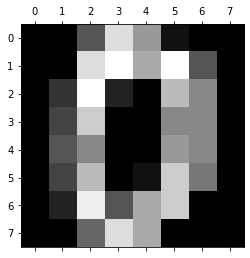

In [3]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

# KNN

In [5]:
(X_train, X_test, y_train, y_test) = train_test_split(
    digits.data, digits.target, test_size=0.25, random_state=42
)

In [6]:
model = KNeighborsClassifier()

model.fit(X_train, y_train)


KNeighborsClassifier()

In [7]:
y_predicted = model.predict(X_test)
y_predicted[0]

6

In [8]:
y_test[0]

6


Accuracy of the Algorithm:  0.9933333333333333


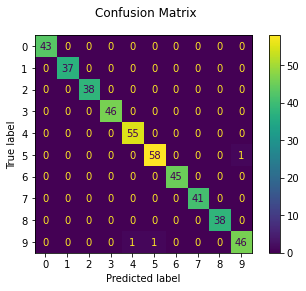

In [9]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
disp = metrics.plot_confusion_matrix(model, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
#print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", model.score(X_test, y_test))
plt.show()

# DECISION TREE

In [10]:
from sklearn import tree
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
y_predicted = dt_classifier.predict(X_test)
y_predicted[3]

4

In [12]:
y_test[3]

7


Accuracy of the Algorithm:  0.86


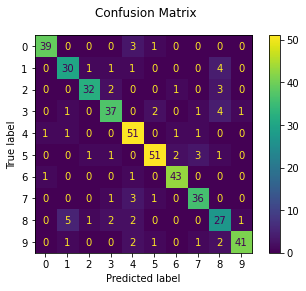

In [13]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
disp = metrics.plot_confusion_matrix(dt_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
#print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", dt_classifier.score(X_test, y_test))
plt.show()

# GAUSSIN NAIVE BAYES

In [14]:
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()
GNB_classifier.fit(X_train, y_train)

GaussianNB()

In [15]:
y_predicted = GNB_classifier.predict(X_test)
y_predicted[3]

7

In [16]:
y_test[3]

7


Accuracy of the Algorithm:  0.8555555555555555


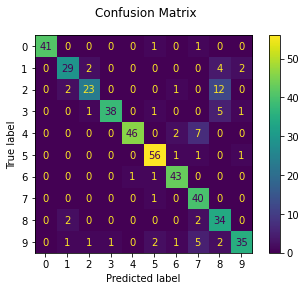

In [17]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
disp = metrics.plot_confusion_matrix(GNB_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
#print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", GNB_classifier.score(X_test, y_test))
plt.show()

# SVM

In [18]:
from sklearn import svm
svm_classifier = svm.SVC(gamma=0.001)
svm_classifier.fit(X_train, y_train)

SVC(gamma=0.001)

In [19]:
y_predicted = svm_classifier.predict(X_test)
y_predicted[9]

2

In [20]:
y_test[9]

2


Accuracy of the Algorithm:  0.9888888888888889


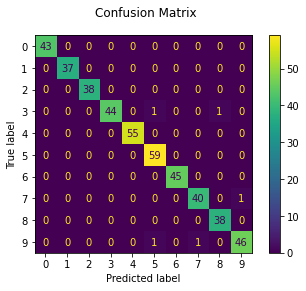

In [21]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
disp = metrics.plot_confusion_matrix(svm_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
#print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", svm_classifier.score(X_test, y_test))
plt.show()

# RANDOM FOREST

In [22]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(max_depth=2, random_state=0)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [23]:
y_predicted = RF_classifier.predict(X_test)
y_predicted[9]

7

In [24]:
y_test[9]

2


Accuracy of the Algorithm:  0.8511111111111112


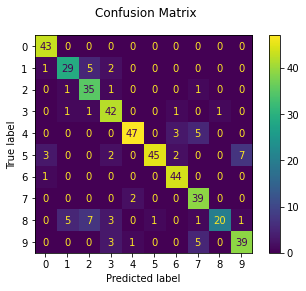

In [25]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
disp = metrics.plot_confusion_matrix(RF_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
#print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", RF_classifier.score(X_test, y_test))
plt.show()

# BY USING GRID SEARCHCV RUN ALL MODEL SIMULTANEOUSLY

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import pandas as pd

cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
def find_best_model_using_gridsearchcv(X_train, y_train):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X_train, y_train)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X_train, y_train)

,model,best_score,best_params
0,linear_regression,0.562518,{'normalize': False}
1,lasso,0.436792,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.654635,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
